In [16]:
#Import libraries 
import opendatasets as od 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read dataset. Note that this requires a Kaggle account
od.download("https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset") 

file=('cardiovascular-disease-dataset/cardio_train.csv') 
df = pd.read_csv(file,sep=';') 
  
#Preview the data
df.head() 

Skipping, found downloaded files in ".\cardiovascular-disease-dataset" (use force=True to force download)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
df.nunique() #Here we see there are no issues in coding male/female, or other variables where we expect a certain number of values
df.info() #Here we see all cols are int84 except weight which is a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


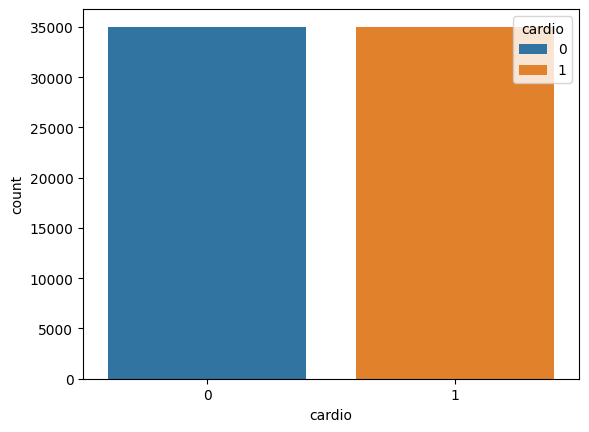

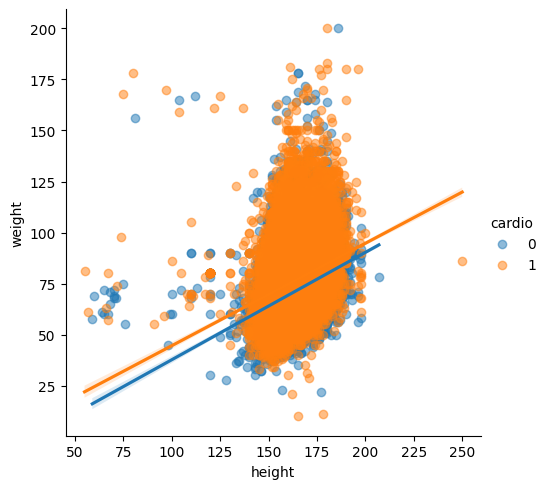

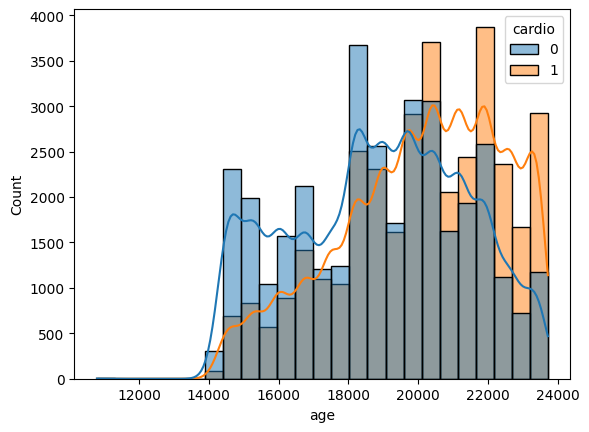

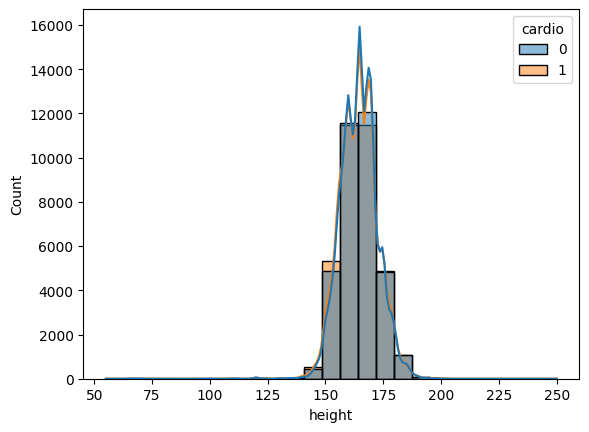

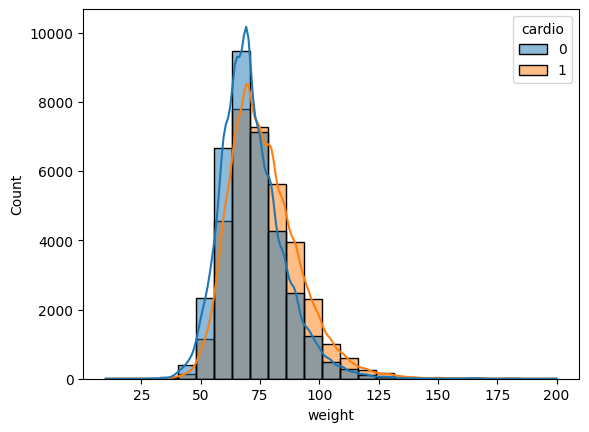

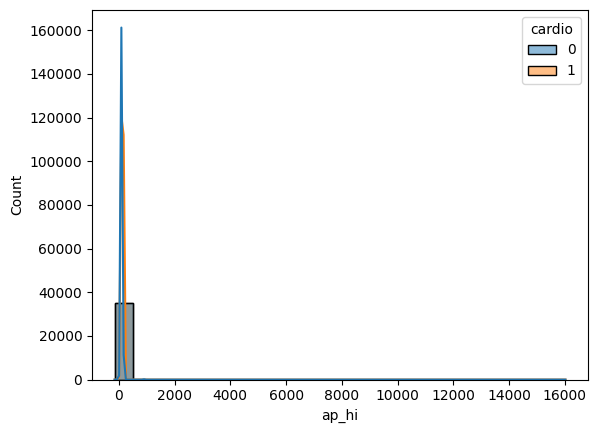

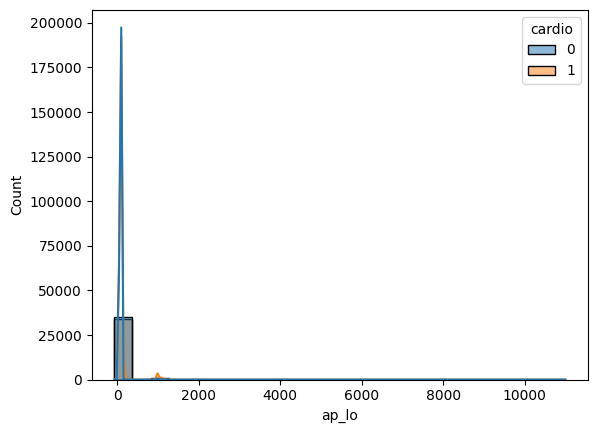

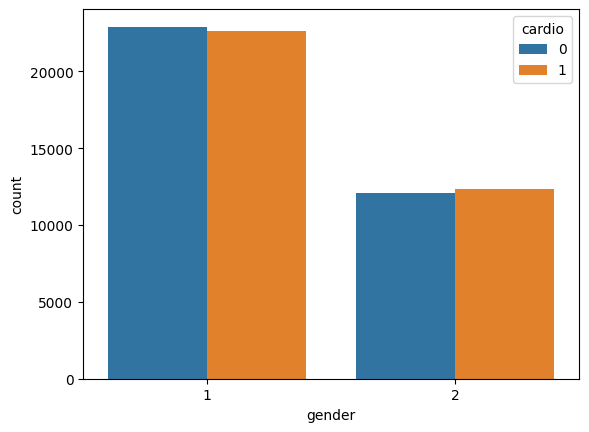

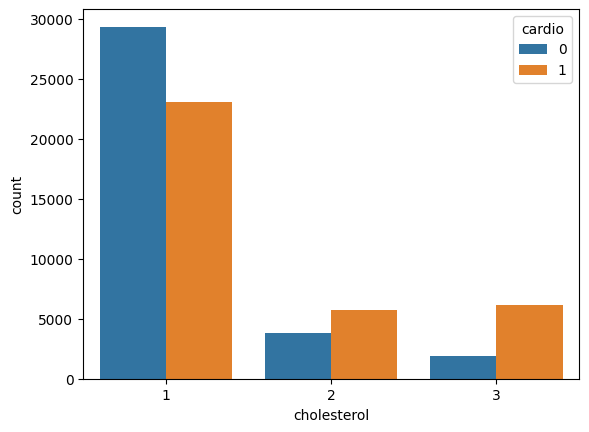

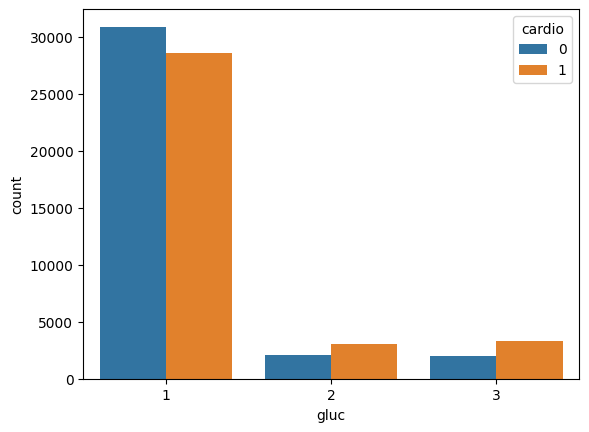

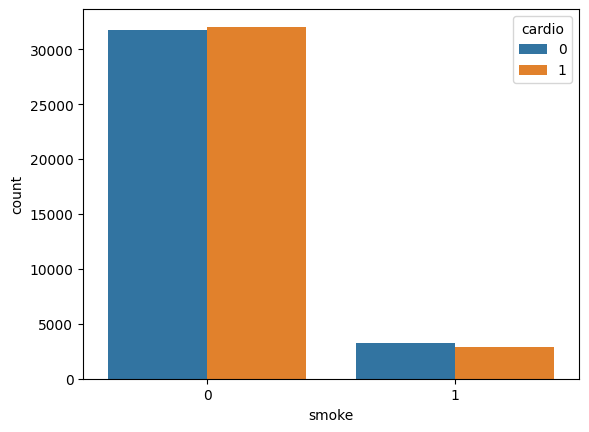

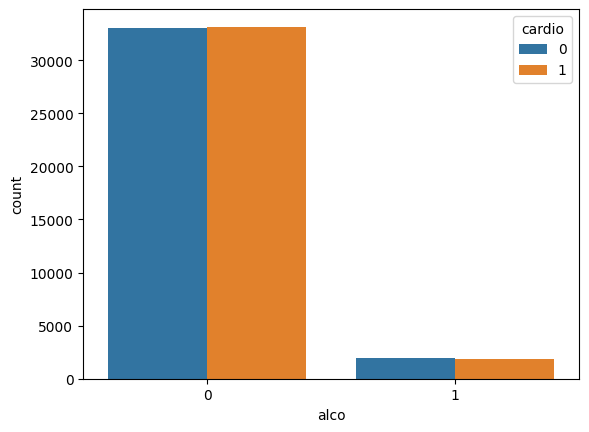

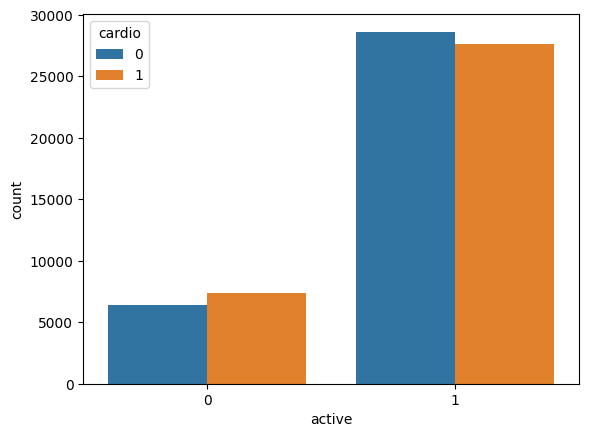

In [36]:
#Create plots to view the distribution of the data
#Start with target variable: 'cardio'. Ensure there is a roughly equal amount of cases/controls. 
plt.figure()
sns.countplot(data=df, x='cardio',hue='cardio')
plt.show() 
#There is roughly an equal amount of samples with 0 and 1 for cardio, which will be optimal for testing/training the models

#Height and weight
sns.lmplot(x='height', y='weight', hue='cardio', data=df, scatter_kws={'alpha': 0.5})
#Height and weight have similar relationships for CVD and non-CVD individuals. Later we will test if we should make a 'BMI' feature. 

#Features for which I want to make a histogram: Height and weight, ap_hi and ap_lo, age 
for i in (['age','height','weight','ap_hi', 'ap_lo']):
    plt.figure()
    sns.histplot(data=df, x=i, hue='cardio', bins=25, kde=True)
    plt.show()
#There appears to be higher CVD instance among older patients
#Height has little impact on CVD
#There appears to be higher CVD instance among heavier patients
#There appears to be higher CVD instance among patients with higher bp

#Features for which I want to make a barplot: Sex, cholesterol, gluc, smoke, alco, active
for i in (['gender','cholesterol','gluc','smoke', 'alco','active']):
    plt.figure()
    sns.countplot(data=df, x=i, hue='cardio')
    plt.show()
#There are more females than males in the dataset. We will address this later. Sex has little impact on CVD instance but there might be a slight bias.
#Cholestrol, glucose, and activity all impact CVD instance.
#Smoking may have a slight impact on CVD instance. Alcohol use likely does not. 

In [51]:
#Here I will make some variables to asses further:
height_m = df['height']/100 #height in meters for bmi
df['bmi'] = df['weight'].astype(int)/(height_m**2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


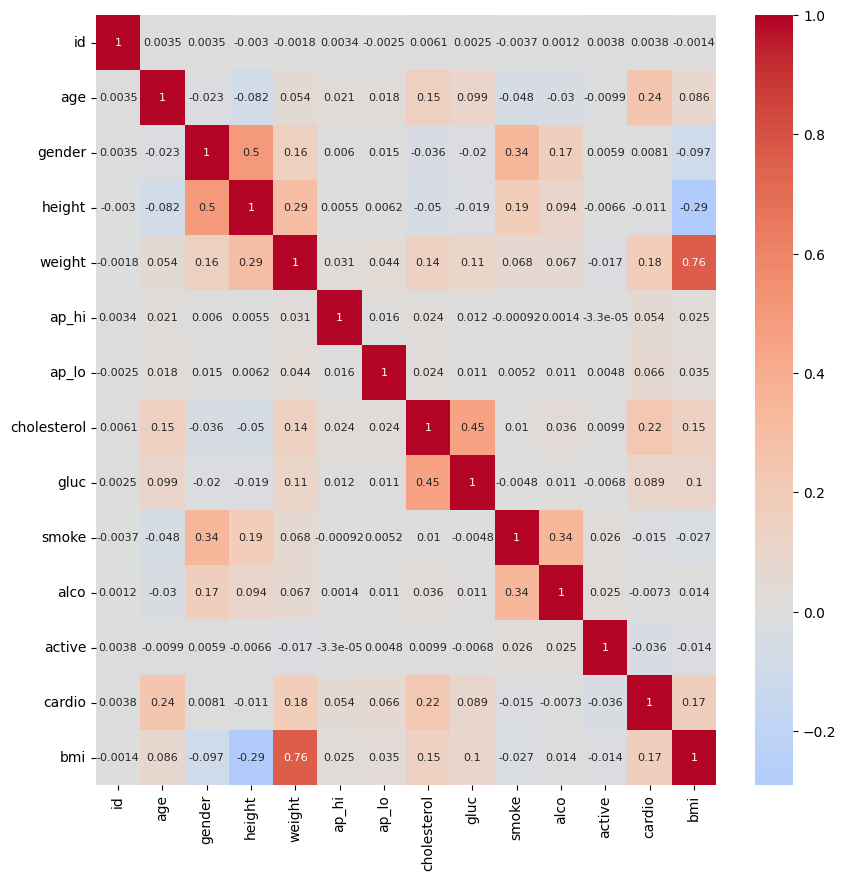

In [61]:
#Now that I made BMI, let's see how the features and target are related to each other:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, annot_kws={"size": 8})
plt.show()
#CVD mostly consists of weak correlations but age, cholesterol, weight, and bmi seem to contribute most. Weight seems to be a better predictor of CVD than BMI. 